### 1. Install and Import Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd Othercomputers/My Laptop/tfad

In [10]:
ls

action.ipynb  MP_Data/  note.txt  test.npy


In [11]:
# install dependencies
%pip install tensorflow==2.10.0 opencv-python mediapipe sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=47aeabfcd5e442e1d73ccc204552128fa29cdb757abac60f99fa30f71d47cc88
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall

In [12]:
%pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### 2. Keypoints using MP Holistic

In [14]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [15]:
def mediapipe_detection(image, model): # function to detect landmarks
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert image to RGB
    image.flags.writeable = False # set image to be read only
    results = model.process(image) # make prediction
    image.flags.writeable = True # set image to be writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # convert image to BGR
    return image, results # return image and results

In [16]:
def draw_landmarks(image, results): # function to draw landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)# draw face connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw right hand connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections

In [17]:
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

In [ ]:
cap = cv2.VideoCapture(0) # capture video from webcam
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # initialize holistic model
    while cap.isOpened(): # loop until video is open
        ret, frame = cap.read() # read video feed
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image) # display the feed
        if cv2.waitKey(10) & 0xFF == ord('q'): # press q to exit
            break
    cap.release() # release the video
    cv2.destroyAllWindows() # close all windows

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

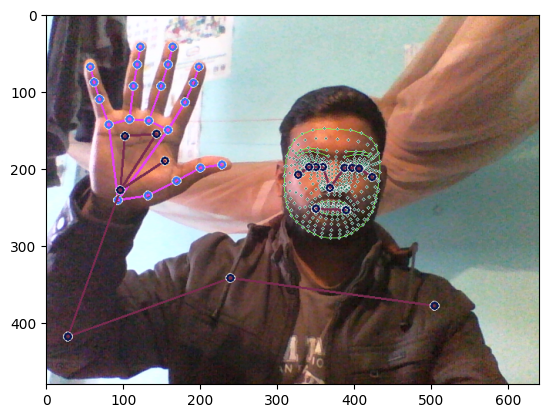

In [ ]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # display frame

### 3. Extract Keypoint Values

In [ ]:
results.pose_landmarks

landmark {
  x: 0.5764763355255127
  y: 0.4704955518245697
  z: -0.8994169235229492
  visibility: 0.9999604225158691
}
landmark {
  x: 0.6050636172294617
  y: 0.41552969813346863
  z: -0.8374158143997192
  visibility: 0.9999120235443115
}
landmark {
  x: 0.6215261220932007
  y: 0.41638699173927307
  z: -0.8371689915657043
  visibility: 0.9998497366905212
}
landmark {
  x: 0.6354463696479797
  y: 0.4179081618785858
  z: -0.8374366760253906
  visibility: 0.9998794794082642
}
landmark {
  x: 0.5621420741081238
  y: 0.41413745284080505
  z: -0.8142107725143433
  visibility: 0.999936580657959
}
landmark {
  x: 0.5479695200920105
  y: 0.4139728248119354
  z: -0.813757061958313
  visibility: 0.9999222159385681
}
landmark {
  x: 0.5337584018707275
  y: 0.4141693711280823
  z: -0.8140423893928528
  visibility: 0.9999545216560364
}
landmark {
  x: 0.6620488166809082
  y: 0.4412427246570587
  z: -0.45503559708595276
  visibility: 0.9998136758804321
}
landmark {
  x: 0.5111790895462036
  y: 0.4341

In [ ]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

NameError: ignored

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(486*3)
    lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
np.save('test', result_test)

In [ ]:
np.load('test.npy')

array([ 0.57647634,  0.47049555, -0.89941692, ...,  0.08987939,
        0.14234155, -0.06307374])

### Setup Folders for Collection

In [19]:
DATA_PATH = os.path.join('MP_Data') # path to save data
actions = np.array(['hello', 'thanks', 'iloveyou']) # list of actions
no_sequences = 30 # number of sequences for each action
sequence_length = 30 # length of each sequence

In [20]:
# hello , thanks , iloveyou

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0) # capture video from webcam
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # initialize holistic model
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read() # read video feed
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv2.imshow('OpenCV Feed', image) # display the feed
                if cv2.waitKey(10) & 0xFF == ord('q'): # press q to exit
                    break
    cap.release() # release the video
    cv2.destroyAllWindows() # close all windows

### Preprocessing Data and Create Label and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
sequences, labels = [], [] # empty lists to store the sequences and labels
for action in actions: # loop through actions
    for sequence in range(no_sequences): # loop through sequences
        window = [] # empty window to store the sequence
        for frame_num in range(sequence_length): # loop through sequence length
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) # extract keypoints
            window.append(res) # append the keypoints to the window
        sequences.append(window) # append the window to the list of sequences
        labels.append(label_map[action]) # append the label to the list of labels
        

In [ ]:
sequences # list of sequences

[[array([ 0.51832634,  0.46031654, -0.82971656, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5185464 ,  0.46213228, -0.81066114, ...,  0.30683222,
          0.33820772, -0.03080595]),
  array([ 0.51853174,  0.46251565, -0.81197786, ...,  0.30479139,
          0.33843061, -0.03259975]),
  array([ 0.5186137 ,  0.46257511, -0.84626132, ...,  0.30611777,
          0.33780929, -0.03016656]),
  array([ 0.51958072,  0.46418446, -0.91347706, ...,  0.31496984,
          0.33919853, -0.02738608]),
  array([ 0.5197705 ,  0.46496123, -0.91555548, ...,  0.32488295,
          0.34149677, -0.02334742]),
  array([ 0.51931441,  0.46732673, -0.94255829, ...,  0.34635332,
          0.34569994, -0.02290918]),
  array([ 0.51794422,  0.46817502, -0.923684  , ...,  0.35095567,
          0.34584183, -0.02072522]),
  array([ 0.51756704,  0.4683657 , -0.88740146, ...,  0.33315504,
          0.33830839, -0.02753922]),
  array([ 0.51756728,  0.46836856, -0.84830081, ...,  0.28178814,
       

In [ ]:
np.array(sequences).shape # shape of the sequences

(90, 30, 1662)

In [ ]:
np.array(labels).shape # check the shape of the labels

(90,)

In [ ]:
X = np.array(sequences) # convert sequences to numpy array

In [ ]:
X.shape

(90, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int) # one-hot encode the labels

In [ ]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) # split the data

In [ ]:
y_test.shape # check the shape of the test labels

(5, 3)

### 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential # import sequential model from keras
from tensorflow.keras.layers import LSTM, Dense # import LSTM and Dense layers from keras
from tensorflow.keras.callbacks import TensorBoard # import TensorBoard callback from keras

In [ ]:
log_dir = os.path.join('Logs') # path to save the logs for TensorBoard
tb_callback = TensorBoard(log_dir=log_dir) # initialize TensorBoard callback

In [78]:
# section 1 - build the model

model = Sequential() # initialize the sequential model

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # add the first LSTM layer
model.add(LSTM(128, return_sequences=True, activation='relu')) # add the second LSTM layer
model.add(LSTM(64, activation='relu')) # add the third LSTM layer
model.add(Dense(64, activation='relu')) # add a dense layer
model.add(Dense(32, activation='relu')) # add a dense layer
model.add(Dense(actions.shape[0], activation='softmax')) # add a dense layer with softmax activation

In [ ]:
[actions.shape[0]] # number of actions

[3]

In [ ]:
# so what it does actually
res = [0.7, 0.2, 0.1]
actions[np.argmax(res)]


'hello'

In [79]:
# section 2 - compile the model

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # compile the model

In [63]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback]) # train the model

Epoch 1/2000
3/3 [==============================] - 1s 145ms/step - loss: 0.3053 - accuracy: 0.8824
Epoch 2/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.3255 - accuracy: 0.8706
Epoch 3/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.4077 - accuracy: 0.8471
Epoch 4/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.6185 - accuracy: 0.7882
Epoch 5/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.7501 - accuracy: 0.7882
Epoch 6/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.7859 - accuracy: 0.7176
Epoch 7/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.8038 - accuracy: 0.6941
Epoch 8/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.7632 - accuracy: 0.7294
Epoch 9/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.6752 - accuracy: 0.6941
Epoch 10/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.4928 - accuracy: 0.8000

In [64]:
model.summary() # print the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

### 8. Make Preditcions

In [65]:
res = model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


In [74]:
actions[np.argmax(res[0])] # predicted action

'hello'

In [75]:
actions[np.argmax(y_test[0])] # actual action

'hello'

### 9. Save Weights

In [76]:
model.save('action.h5') # save the model

In [77]:
del model

In [80]:
# load the model
# after running section 1 and section 2 run this cell
model.load_weights('action.h5')

### 10. Evalution using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(X_test) # predict the test data

1/1 [==============================] - 1s 928ms/step


In [83]:
ytrue = np.argmax(y_test, axis=1).tolist() # convert one-hot encoded test labels to list
yhat = np.argmax(yhat, axis=1).tolist() # convert one-hot encoded predicted labels to list

In [84]:
yhat # predicted labels

[0, 1, 2, 2, 0]

In [85]:
ytrue # actual labels

[0, 1, 0, 2, 0]

In [86]:
multilabel_confusion_matrix(ytrue, yhat) # confusion matrix

array([[[2, 0],
        [1, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [87]:
accuracy_score(ytrue, yhat) # accuracy score

0.8

### 11. Test in Real-Time

In [93]:
from scipy import stats

In [94]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

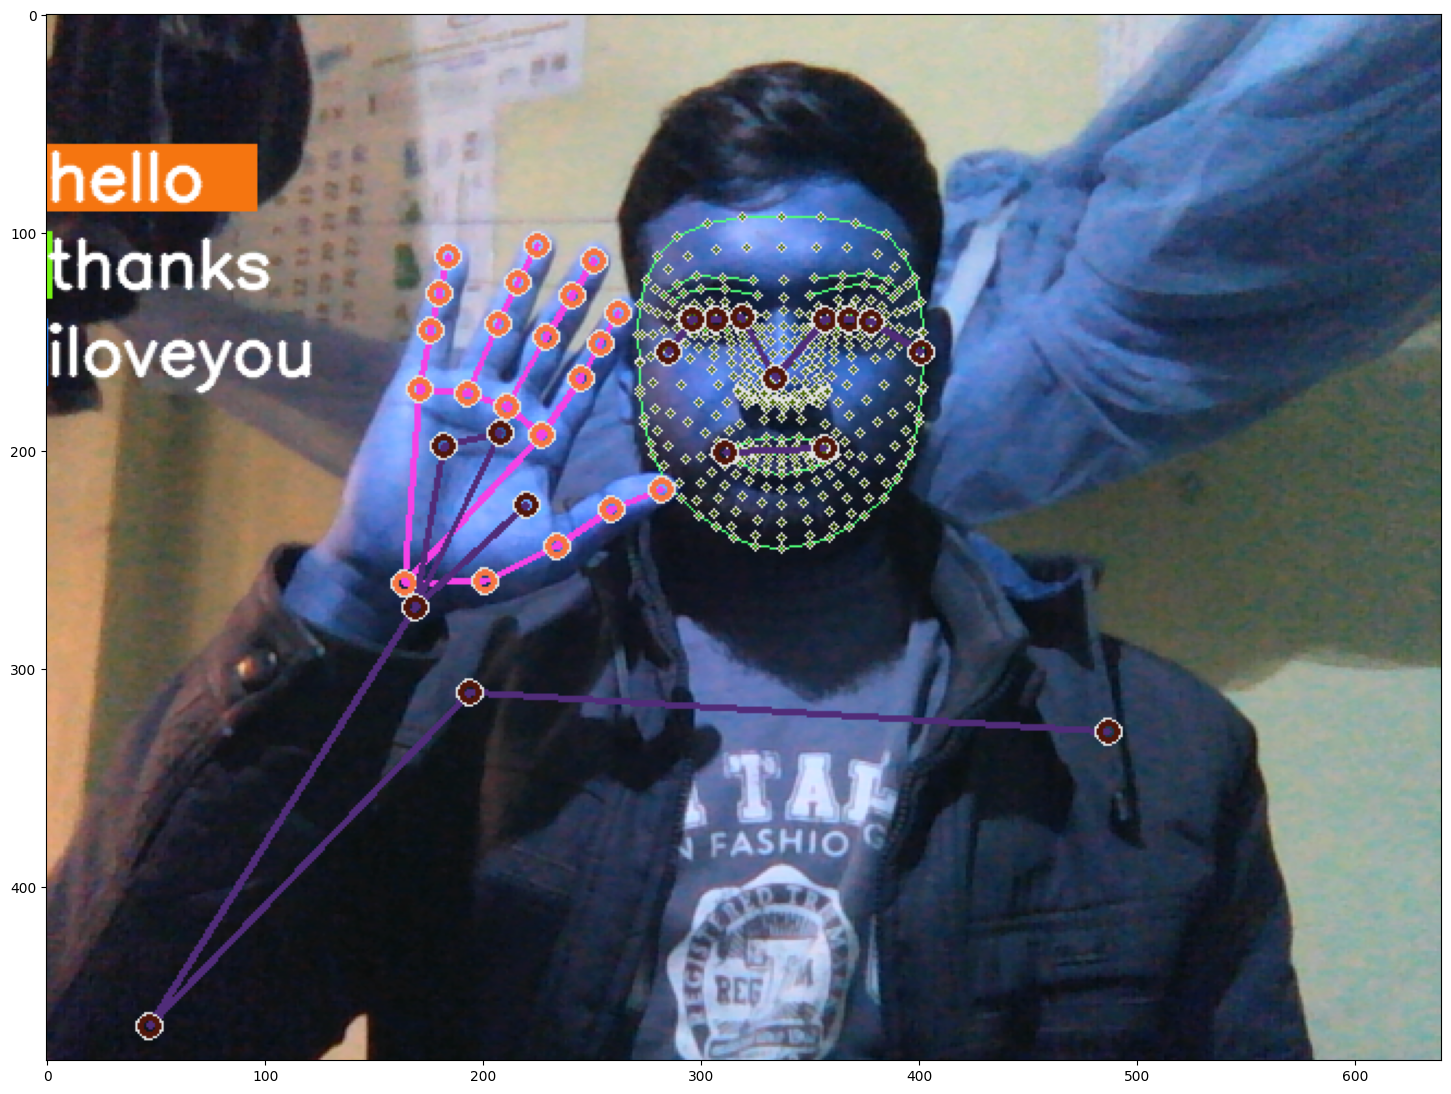

In [95]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [98]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            # print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [97]:
cap.release()
cv2.destroyAllWindows()